In [1]:
# Determinando a relação linear entre umidade e temperatura utilizando dados da cidade de Szeged localizada na Hungria. 
# Link para o dataset: Este é um dataset público do Kaggle (https://www.kaggle.com/budincsevity/szeged-weather)
# Pedro Fortunato, P2 Data Science

In [71]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Carregando os dados que utilizaremos
dados = pd.read_csv(r'C:\Users\Pichau\Downloads\weatherHistory.csv')

# Exibe as primeiras linhas do data frame e caso seja passada uma váriavel 'x' entre parenteses, irá exibir tal quantidade
dados.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [53]:
dados.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [55]:
# Exibindo o nome das colunas
dados.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [69]:
# Excluido algumas colunas que não serão relevantes
dados = dados.drop(['Formatted Date', 'Summary', 'Daily Summary'], axis=1, errors='ignore')  # Utilizamos o coando 'errors='ignore' para previnir que seja exibido um erro devido a caracteres extras e até mesmo espaços

# Verifique as primeiras linhas do DataFrame após a exclusão
dados.head()


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


<AxesSubplot:xlabel='Precip Type', ylabel='Temperature (C)'>

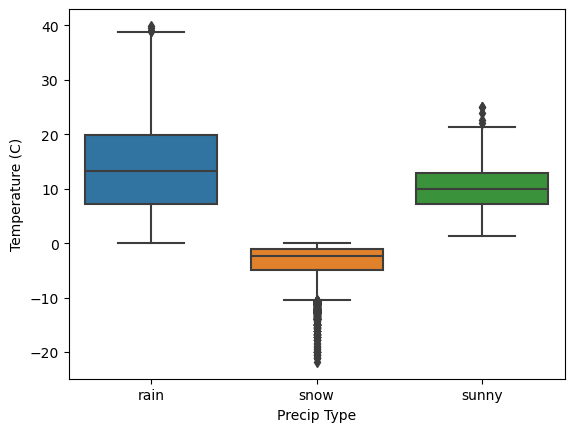

In [72]:
# Determinando os tipos de precipitação
dados['Precip Type'].unique()
dados['Precip Type'] = dados['Precip Type'].fillna('sunny')
dados['Precip Type'].unique()
sns.boxplot(data=dados,y='Temperature (C)',x='Precip Type')

In [73]:
#Para os casos em que o tipo de precipitação são nulos, temos um dia sem chuva. Desta forma iremos fazer uma análise para cada um dos três casos

dias_sol = dados[(dados['Precip Type'] == 'sunny')]
dias_chuva = dados[(dados['Precip Type'] == 'rain')]
dias_neve = dados[(dados['Precip Type'] == 'snow')]

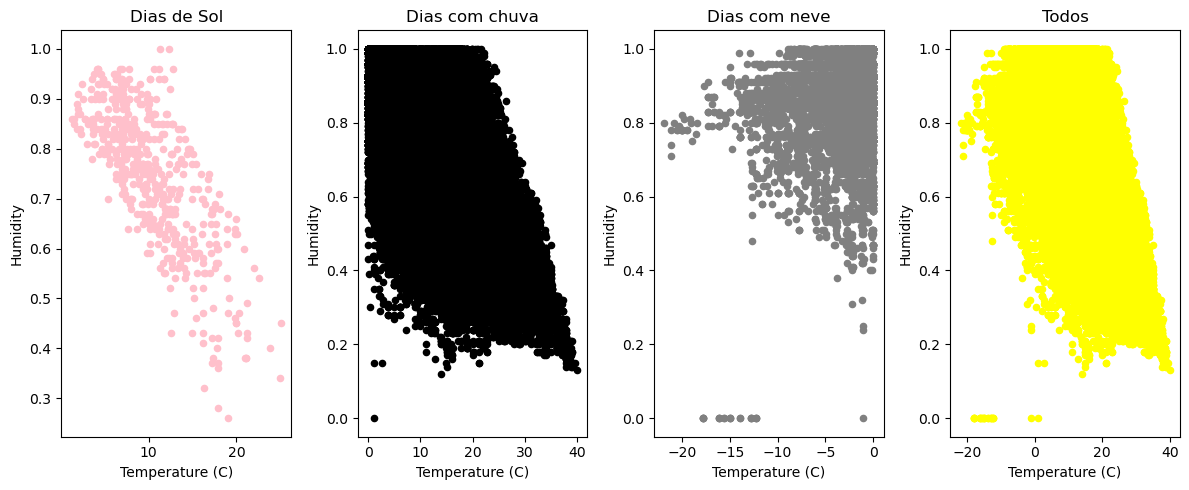

In [76]:
# Plotando um gráfico em relação a umidade e temperatura
fig, ax = plt.subplots(1,4,figsize=(12,5))
dias_sol.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[0],title='Dias de Sol',color='pink');
dias_chuva.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[1],title='Dias com chuva',color='black');
dias_neve.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[2],title='Dias com neve',color='grey');
dados.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[3],title='Todos',color='yellow');
plt.tight_layout();

# Dias de sol

In [78]:
# Exibindo as informações sobre os dias de sol
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    float64
 2   Apparent Temperature (C)  517 non-null    float64
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    float64
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    float64
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [79]:
# Retornando o número de valores ausentes em cada coluna do DataFrame
dias_sol.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [80]:
# Armazenando informações sobre temperatura e umidade nas variáveis X e Y
X = dias_sol['Temperature (C)'].values.reshape(-1, 1)
Y = dias_sol['Humidity'].values.reshape(-1, 1)

In [81]:
# Importando uma biblioteca que utilizaremos e Separando em treino e teste 
from sklearn.model_selection import train_test_split
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)
X_treino.size
X_teste.size

156

In [82]:
# Agora criaremos o modelo de regressão linear
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_treino,Y_treino)
Y_previsto = modelo.predict(X_teste)

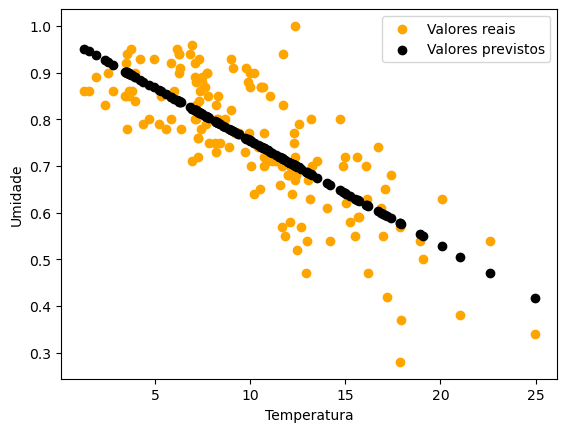

In [93]:
# Plotando graficamente
plt.scatter(X_teste,Y_teste,color='orange',label='Valores reais')
plt.scatter(X_teste,Y_previsto,color='black',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [85]:
# Analisando erros da previsão e importando biliotecas necessárias para tal

from sklearn.metrics import mean_absolute_error,mean_squared_error 
MAE_sol = mean_absolute_error(Y_teste,Y_previsto)
RMSE_sol = np.sqrt(mean_squared_error(Y_teste,Y_previsto))
print('MAE = {:0.4f}'.format(MAE_sol))
print('RMSE = {:0.4f}'.format(RMSE_sol))

MAE = 0.0698
RMSE = 0.0891


# DIAS DE CHUVA, UTILIZAREMOS A MESMA LÓGICA E OS MESMOS PRECESSOS EM QUE ANALISAMOS OS 'DIAS DE SOL'

In [86]:
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               85224 non-null  object 
 1   Temperature (C)           85224 non-null  float64
 2   Apparent Temperature (C)  85224 non-null  float64
 3   Humidity                  85224 non-null  float64
 4   Wind Speed (km/h)         85224 non-null  float64
 5   Wind Bearing (degrees)    85224 non-null  float64
 6   Visibility (km)           85224 non-null  float64
 7   Loud Cover                85224 non-null  float64
 8   Pressure (millibars)      85224 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [87]:
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [88]:
X_chuva = dias_chuva['Temperature (C)'].values.reshape(-1, 1)
Y_chuva = dias_chuva['Humidity'].values.reshape(-1, 1)

In [90]:
X_treino_chuva, X_teste_chuva, Y_treino_chuva, Y_teste_chuva = train_test_split(X_chuva, Y_chuva, test_size=0.30, shuffle=True, random_state=0)
X_treino_chuva.size
X_teste_chuva.size
modelo2 = LinearRegression()
modelo2.fit(X_treino_chuva,Y_treino_chuva)
Y_previsto_chuva = modelo2.predict(X_teste_chuva)

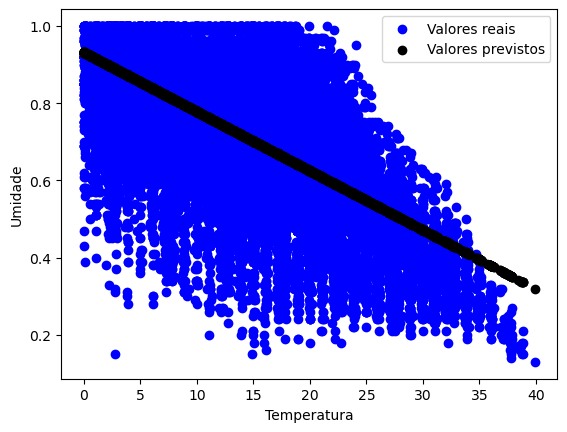

In [92]:
# Plotando gráficamente
plt.scatter(X_teste_chuva,Y_teste_chuva,color='blue',label='Valores reais')
plt.scatter(X_teste_chuva,Y_previsto_chuva,color='black',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [94]:
MAE_chuva = mean_absolute_error(Y_teste_chuva,Y_previsto_chuva)
RMSE_chuva = np.sqrt(mean_squared_error(Y_teste_chuva,Y_previsto_chuva))
print('MAE = {:0.4f}'.format(MAE_chuva))
print('RMSE = {:0.4f}'.format(RMSE_chuva))

MAE = 0.1211
RMSE = 0.1506


# PARA OS DIAS COM NEVE TAMBÉM UTILIZAREMOS A MESMA LÓGICA E PREOCESSOS 

In [95]:
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               10712 non-null  object 
 1   Temperature (C)           10712 non-null  float64
 2   Apparent Temperature (C)  10712 non-null  float64
 3   Humidity                  10712 non-null  float64
 4   Wind Speed (km/h)         10712 non-null  float64
 5   Wind Bearing (degrees)    10712 non-null  float64
 6   Visibility (km)           10712 non-null  float64
 7   Loud Cover                10712 non-null  float64
 8   Pressure (millibars)      10712 non-null  float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [96]:
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [97]:
X_neve = dias_neve['Temperature (C)'].values.reshape(-1, 1)
Y_neve = dias_neve['Humidity'].values.reshape(-1, 1)
X_treino_neve, X_teste_neve, Y_treino_neve, Y_teste_neve = train_test_split(X_neve, Y_neve, test_size=0.30, shuffle=True, random_state=0)
X_treino_neve.size
X_teste_neve.size
modelo3 = LinearRegression()
modelo3.fit(X_treino_neve,Y_treino_neve)
Y_previsto_neve = modelo3.predict(X_teste_neve)

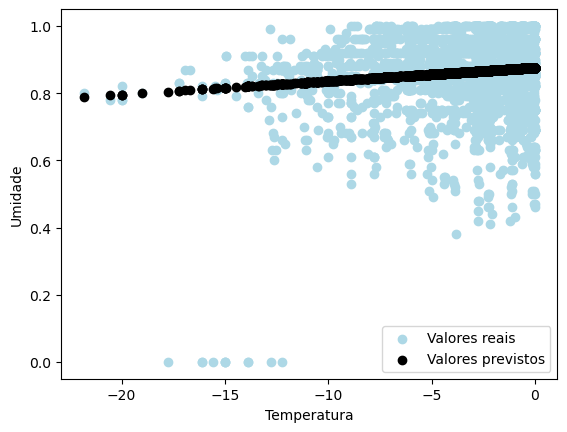

In [100]:
# Plotando graficamente
plt.scatter(X_teste_neve,Y_teste_neve,color='lightblue',label='Valores reais')
plt.scatter(X_teste_neve,Y_previsto_neve,color='black',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [101]:
MAE_neve = mean_absolute_error(Y_teste_neve,Y_previsto_neve)
RMSE_neve = np.sqrt(mean_squared_error(Y_teste_neve,Y_previsto_neve))
print('MAE = {:0.4f}'.format(MAE_neve))
print('RMSE = {:0.4f}'.format(RMSE_neve))

MAE = 0.0824
RMSE = 0.1130
